In [1]:
import sys
sys.path.append('/Users/billystrickland/Documents/code/resonators')
import utils.resonator_functions as rf
import numpy as np
from shabanipy.jy_mpl_settings.settings import jy_mpl_rc
from shabanipy.jy_mpl_settings.colors import line_colors
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.style.use(jy_mpl_rc)


root = '/Users/billystrickland/Documents/code/resonators/data/'

<ipython-input-6-8d4e6068c3b8>:26: RuntimeWarning: invalid value encountered in power
  return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))


Q0 3796 +-, 35449 , Qtls, 9602045 +-, 27560000046050 , nc, 11456002 +-, 26806400000007
Q0 11918 +-, 182376 , Qtls, 47121499 +-, 14620000003119 , nc, 42795662 +-, 2636242


<ipython-input-6-8d4e6068c3b8>:26: RuntimeWarning: invalid value encountered in power
  return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))
<ipython-input-6-8d4e6068c3b8>:26: RuntimeWarning: invalid value encountered in power
  return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))


Q0 39667 +-, 455 , Qtls, 1760 +-, 486 , nc, 3697 +-, 4913
Q0 33800 +-, 2298 , Qtls, 483 +-, 100 , nc, 142320 +-, 122640


<ipython-input-6-8d4e6068c3b8>:26: RuntimeWarning: invalid value encountered in power
  return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))
<ipython-input-6-8d4e6068c3b8>:26: RuntimeWarning: invalid value encountered in power
  return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))


niovbiumQ0 212500 +-, 6065 , Qtls, 975 +-, 59 , nc, 1392 +-, 593


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


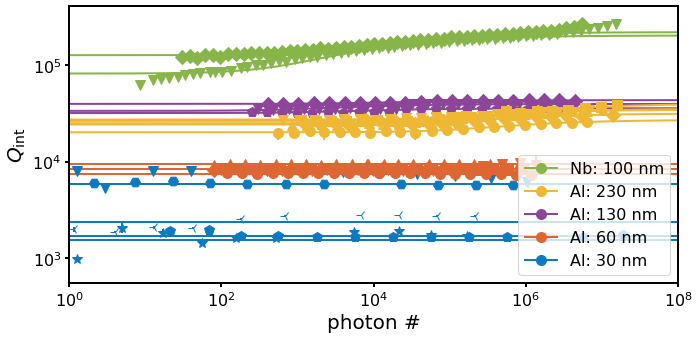

In [6]:
def initialize(sample, ID, Q0 =31e3, c = 0, m = 0,Qtls = .85e3, nc = 9e4, label = 'label'):
    file = '/Users/billystrickland/Documents/code/resonators/data/'+sample+'/results/'
    FILES = []
    for i in range(len(ID)):
        FILES.append([file+ID[i]+'.csv'])
    photon_d = np.logspace(-1, 8, 10000)
    photon, qi_diacorr, qi_diacorr_err, freq, freq_err = [],[],[],[],[]
    for i in range(len(FILES)):
        results = rf.proc_csv(FILES[i])            
        photon1, power1, qi_diacorr1, qi_diacorr_err1, qc1, qc_err1, ql1, ql_err1, freq1, freq_err1 = rf.get_results(results, 100000) 
        photon.append(photon1)
        qi_diacorr.append(qi_diacorr1)
        qi_diacorr_err.append(qi_diacorr_err1)

    photon, qi_diacorr, qi_diacorr_err = np.concatenate(photon), np.concatenate(qi_diacorr), np.concatenate(qi_diacorr_err)

    if sample == 'JS681-6CLQ-004-BSLB-001' or sample =='JS631-6cavlowq-1-BS-001':
        ax.errorbar(np.array(photon),qi_diacorr,yerr=qi_diacorr_err,
                    linestyle = 'None',color=line_colors[c], marker = markers[m], label=label)
    else:
        ax.errorbar(np.array(photon),qi_diacorr,yerr=qi_diacorr_err,
                    linestyle = 'None',color=line_colors[c], marker = markers[m], label=label)
    def func_tls(n, Q0, Qtls, nc, beta):
        kb = 8.617e-5
        h = 4.136e-15
        return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))

    popt, pcov = curve_fit(func_tls, photon, qi_diacorr, sigma = qi_diacorr_err, 
                        p0 = [Q0, Qtls, nc, 0.5],
                        bounds=([0, 0,  -np.inf, 0.49999], [np.inf, np.inf, np.inf, .50001]),
                        maxfev = 1000000000
                       )
    perr = np.sqrt(np.diag(pcov))
    def round_to_n(x, n):
        if x == 0:
            return 0
        else:
            return round(x, -int(np.floor(np.log10(abs(x)))) + (n - 1))

    popt = np.vectorize(lambda x: round_to_n(x, 3))(popt)
    perr = np.vectorize(lambda x: round_to_n(x, 3))(perr)
#     print(popt)
#     print(f'{sample}, Q0, Qtls, nc, beta: {popt}')
#     print(perr)
    if sample == 'JS681-6CLQ-004-BSLB-001' or sample =='JS631-6cavlowq-1-BS-001':
        plotter =[np.average(qi_diacorr), 5.47e+02, 1.30e+05, 5.00e-01]
        plt.axhline(y = np.average(qi_diacorr), 
                 color = line_colors[c], 
                )
    else:
        plt.plot(photon_d, func_tls(photon_d, *popt), 
                 color = line_colors[c],
                )
    return popt, perr

#     plt.legend(fontsize = 14, bbox_to_anchor=(1.05, .95))

fig, ax = rf.make_plot_pre('photon #', '$Q_\mathrm{int}$', xscale = 'log', figsize = (10,5))
ax.set_yscale('linear')
# plt.ylim(0, 45000)
plt.xlim(1e0, 1e8)
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'H', '3', '2', '1']


sample = 'JS631-6cavlowq-1-BS-001' # 30 nm
data = [
    {'ID': ['res0'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 0, 'm':4, 'nc': 9e4, 'label': '30 nm, R1'},
    {'ID': ['res1'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 0, 'm':5, 'nc': 9e4, 'label': '30 nm, R2'},
    {'ID': ['res2'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 0, 'm':6, 'nc': 9e4, 'label': '30 nm, R4'},
    {'ID': ['res3'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 0, 'm':7, 'nc': 9e4, 'label': '30 nm, R5'},
    {'ID': ['res4'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 0, 'm':8, 'nc': 9e4, 'label': '30 nm, R6'},
]
results = []
err = []
for i, entry in enumerate(data):
    popt, perr = initialize(sample, entry['ID'], Q0=entry['Q0'], Qtls=entry['Qtls'], c=entry['c'], m = entry['m'],nc=entry['nc'], label=entry['label'])
    results.append(popt)
    err.append(perr)
print(f'Q0 {np.mean(np.array(results)[:,0]):1.0f}', f'+-, {np.mean(np.array(err)[:,0]):1.0f}',
      f', Qtls, {np.mean(np.array(results)[:,1]):1.0f}',f'+-, {np.mean(np.array(err)[:,1]):1.0f}',
      f', nc, {np.mean(np.array(results)[:,2]):1.0f}', f'+-, {np.mean(np.array(err)[:,2]):1.0f}')

fig.tight_layout()
plt.savefig(f'power-tls_{0}.eps', format = 'eps')

sample = 'JS681-6CLQ-004-BSLB-001' # 60 nm

data = [
    {'ID': ['0100', '0120'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 1, 'm':0, 'nc': 9e4, 'label': 'R3'},
    {'ID': ['0101', '0121'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 1, 'm':4, 'nc': 9e4, 'label': 'R3'},
    {'ID': ['0102', '0122'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 1, 'm':1, 'nc': 9e4, 'label': '60 nm, R4'},
    {'ID': ['0103', '0123'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 1, 'm':2, 'nc': 9e4, 'label': '60 nm, R5'},
    {'ID': ['0104', '0124'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 1, 'm':3, 'nc': 9e4, 'label': '60 nm, R6'},
]
results = []
err = []
for i, entry in enumerate(data):
    popt, perr = initialize(sample, entry['ID'], Q0=entry['Q0'], Qtls=entry['Qtls'], c=entry['c'], m = entry['m'],nc=entry['nc'], label=entry['label'])
    results.append(popt)
    err.append(perr)
print(f'Q0 {np.mean(np.array(results)[:,0]):1.0f}', f'+-, {np.mean(np.array(err)[:,0]):1.0f}',
      f', Qtls, {np.mean(np.array(results)[:,1]):1.0f}',f'+-, {np.mean(np.array(err)[:,1]):1.0f}',
      f', nc, {np.mean(np.array(results)[:,2]):1.0f}', f'+-, {np.mean(np.array(err)[:,2]):1.0f}')

fig.tight_layout()
plt.savefig(f'power-tls_{1}.eps', format = 'eps')


sample = 'JS681-6CLQ-003-BS-001'

data = [
#     {'ID': ['0060', '0070'], 'Q0': 40e3, 'Qtls': 0.85e3, 'c': 2, 'm':1,'nc': 4e5, 'label': '130 nm, R4'},
#     {'ID': ['0061', '0071'], 'Q0': 40e3, 'Qtls': 0.85e3, 'c': 2, 'm':2,'nc': 4e5, 'label': '130 nm, R4'},
    {'ID': ['0062', '0072'], 'Q0': 40e3, 'Qtls': 0.85e3, 'c': 2, 'm':3,'nc': 4e5, 'label': '130 nm, R4'},
    {'ID': ['0063', '0073'], 'Q0': 34e3, 'Qtls': 0.85e3, 'c': 2, 'm':4,'nc': 9e4, 'label': '130 nm, R5'},
    {'ID': ['0064', '0074'], 'Q0': 30e3, 'Qtls': 0.6e3, 'c': 2, 'm':5,'nc': 9e4, 'label': '130 nm, R6'},
]
results = []
err = []
for i, entry in enumerate(data):
    popt, perr = initialize(sample, entry['ID'], Q0=entry['Q0'], Qtls=entry['Qtls'], c=entry['c'], m = entry['m'],nc=entry['nc'], label=entry['label'])
    results.append(popt)
    err.append(perr)
print(f'Q0 {np.mean(np.array(results)[:,0]):1.0f}', f'+-, {np.mean(np.array(err)[:,0]):1.0f}',
      f', Qtls, {np.mean(np.array(results)[:,1]):1.0f}',f'+-, {np.mean(np.array(err)[:,1]):1.0f}',
      f', nc, {np.mean(np.array(results)[:,2]):1.0f}', f'+-, {np.mean(np.array(err)[:,2]):1.0f}')

fig.tight_layout()
plt.savefig(f'power-tls_{2}.eps', format = 'eps')
    
sample = 'JS681-6CLQ-005-BSLB-001'
data = [
    {'ID': ['0030', '0040'], 'Q0': 26e3, 'Qtls': 0.6e3, 'c': 3, 'm':3,'nc': 9e4, 'label': 'R1'},
    {'ID': ['0031', '0041'], 'Q0': 26e3, 'Qtls': 0.6e3, 'c': 3, 'm':4,'nc': 9e4, 'label': 'R2'},
    {'ID': ['0032', '0042'], 'Q0': 26e3, 'Qtls': 0.6e3, 'c': 3, 'm':0, 'nc': 9e4, 'label': '230 nm, R4'},
    {'ID': ['0033', '0043'], 'Q0': 40e3, 'Qtls': 0.55e3, 'c': 3, 'm':1, 'nc': 2e5, 'label': '230 nm, R5'},
    {'ID': ['0034', '0044'], 'Q0': 36e3, 'Qtls': 0.6e3, 'c': 3, 'm':2, 'nc': 1e5, 'label': '230 nm, R6'},
]
results = []
err = []
for i, entry in enumerate(data):
    popt, perr = initialize(sample, entry['ID'], Q0=entry['Q0'], Qtls=entry['Qtls'], c=entry['c'], m = entry['m'],nc=entry['nc'], label=entry['label'])
    results.append(popt)
    err.append(perr)
print(f'Q0 {np.mean(np.array(results)[:,0]):1.0f}', f'+-, {np.mean(np.array(err)[:,0]):1.0f}',
      f', Qtls, {np.mean(np.array(results)[:,1]):1.0f}',f'+-, {np.mean(np.array(err)[:,1]):1.0f}',
      f', nc, {np.mean(np.array(results)[:,2]):1.0f}', f'+-, {np.mean(np.array(err)[:,2]):1.0f}')

fig.tight_layout()
plt.savefig(f'power-tls_{3}.eps', format = 'eps')

    
sample = 'InP-Nb_LO-7barresonators-v1_KDBHE01'
data = [
    {'ID': ['5.14GHz'], 'Q0': 26e3, 'Qtls': 0.6e3, 'c': 4, 'm':3,'nc': 9e4, 'label': 'R1'},
#     {'ID': ['6.52GHz'], 'Q0': 26e3, 'Qtls': 0.6e3, 'c': 4, 'm':3,'nc': 9e4, 'label': 'R2'},
    {'ID': ['8.5GHz'], 'Q0': 26e3, 'Qtls': 0.6e3, 'c': 4, 'm':4,'nc': 9e4, 'label': 'R3'},


]
results = []
err = []
for i, entry in enumerate(data):
    popt, perr = initialize(sample, entry['ID'], Q0=entry['Q0'], Qtls=entry['Qtls'], c=entry['c'], m = entry['m'],nc=entry['nc'], label=entry['label'])
    results.append(popt)
    err.append(perr)
print(f'niobium Q0 {np.mean(np.array(results)[:,0]):1.0f}', f'+-, {np.mean(np.array(err)[:,0]):1.0f}',
      f', Qtls, {np.mean(np.array(results)[:,1]):1.0f}',f'+-, {np.mean(np.array(err)[:,1]):1.0f}',
      f', nc, {np.mean(np.array(results)[:,2]):1.0f}', f'+-, {np.mean(np.array(err)[:,2]):1.0f}')

plt.yscale('log')

legend_handles = [
    Line2D([0], [0], marker='o', color=line_colors[4], markersize=10, label='Nb: 100 nm'),
    Line2D([0], [0], marker='o', color=line_colors[3], markersize=10, label='Al: 230 nm'),
    Line2D([0], [0], marker='o', color=line_colors[2], markersize=10, label='Al: 130 nm'),
    Line2D([0], [0], marker='o', color=line_colors[1], markersize=10, label='Al: 60 nm'),
    Line2D([0], [0], marker='o', color=line_colors[0], markersize=10, label='Al: 30 nm'),
]

# Add legend with custom handles
plt.legend(handles=legend_handles)

fig.tight_layout()
plt.savefig(f'power-tls_{4}.eps', format = 'eps')


<ipython-input-2-8d4e6068c3b8>:26: RuntimeWarning: invalid value encountered in power
  return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))
<ipython-input-2-8d4e6068c3b8>:26: RuntimeWarning: invalid value encountered in power
  return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))
<ipython-input-2-8d4e6068c3b8>:26: RuntimeWarning: invalid value encountered in power
  return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))
<ipython-input-2-8d4e6068c3b8>:26: RuntimeWarning: invalid value encountered in power
  return 1/((1/Q0)+(1/(Qtls*(1+(n/nc))**beta/np.tanh(h*freq1[0]/kb*(15e-3)))))


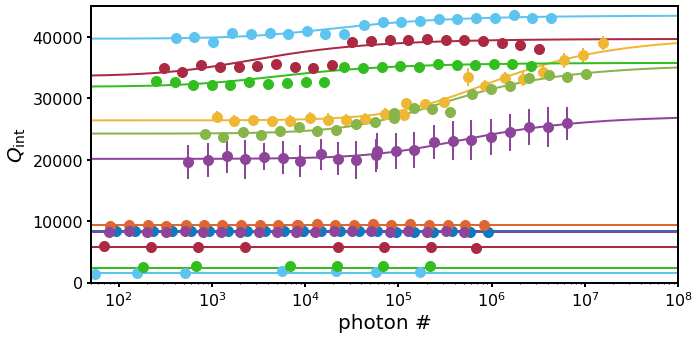

In [3]:
sample = 'JS681-6CLQ-005-BSLB-001'
fig, ax = rf.make_plot_pre('photon #', '$Q_\mathrm{int}$', xscale = 'log', figsize = (10,5))
# ax.set_yscale(yscale)
plt.ylim(0, 45000)
plt.xlim(5e1, 1e8)
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'H', '3', '2', '1']

data = [
#     {'ID': ['0030', '0040'], 'Q0': 26e3, 'Qtls': 0.6e3, 'c': 2, 'nc': 9e4, 'label': 'R1'},
#     {'ID': ['0031', '0041'], 'Q0': 26e3, 'Qtls': 0.6e3, 'c': 2, 'nc': 9e4, 'label': 'R2'},
    {'ID': ['0032', '0042'], 'Q0': 26e3, 'Qtls': 0.6e3, 'c': 2, 'nc': 9e4, 'label': '30+200 nm, R4'},
    {'ID': ['0033', '0043'], 'Q0': 40e3, 'Qtls': 0.55e3, 'c': 3, 'nc': 2e5, 'label': '30+200 nm, R5'},
    {'ID': ['0034', '0044'], 'Q0': 36e3, 'Qtls': 0.6e3, 'c': 4, 'nc': 1e5, 'label': '30+200 nm, R6'},
]

for entry in data:
    initialize(sample, entry['ID'], Q0=entry['Q0'], Qtls=entry['Qtls'], c=entry['c'], nc=entry['nc'], label=entry['label'])

sample = 'JS681-6CLQ-003-BS-001'

data = [
    {'ID': ['0062', '0072'], 'Q0': 40e3, 'Qtls': 0.85e3, 'c': 5, 'nc': 4e5, 'label': '30+100 nm, R4'},
    {'ID': ['0063', '0073'], 'Q0': 34e3, 'Qtls': 0.85e3, 'c': 6, 'nc': 9e4, 'label': '30+100 nm, R5'},
    {'ID': ['0064', '0074'], 'Q0': 30e3, 'Qtls': 0.6e3, 'c': 7, 'nc': 9e4, 'label': '30+100 nm, R6'},
]

for entry in data:
    initialize(sample, entry['ID'], Q0=entry['Q0'], Qtls=entry['Qtls'], c=entry['c'], nc=entry['nc'], label=entry['label'])


sample = 'JS681-6CLQ-004-BSLB-001'

data = [
#     {'ID': ['0100', '0120'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 8, 'nc': 9e4, 'label': 'R3'},
#     {'ID': ['0101', '0121'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 9, 'nc': 9e4, 'label': 'R3'},
    {'ID': ['0102', '0122'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 0, 'nc': 9e4, 'label': '30+30 nm, R4'},
    {'ID': ['0103', '0123'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 1, 'nc': 9e4, 'label': '30+30 nm, R5'},
    {'ID': ['0104', '0124'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 2, 'nc': 9e4, 'label': '30+30 nm, R6'},
]

for entry in data:
    initialize(sample, entry['ID'], Q0=entry['Q0'], Qtls=entry['Qtls'], c=entry['c'], nc=entry['nc'], label=entry['label'])

sample = 'JS631-6cavlowq-1-BS-001'

data = [
#     {'ID': ['res0'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 3, 'nc': 9e4, 'label': 'R3'},
#     {'ID': ['res1'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 4, 'nc': 9e4, 'label': 'R3'},
    {'ID': ['res2'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 5, 'nc': 9e4, 'label': '30 nm, R4'},
    {'ID': ['res3'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 6, 'nc': 9e4, 'label': '30 nm, R5'},
    {'ID': ['res4'], 'Q0': 7e3, 'Qtls': 50e3, 'c': 7, 'nc': 9e4, 'label': '30 nm, R6'},
]

for entry in data:
    initialize(sample, entry['ID'], Q0=entry['Q0'], Qtls=entry['Qtls'], c=entry['c'], nc=entry['nc'], label=entry['label'])

    
fig.tight_layout()
plt.savefig('power-tls.eps', format = 'eps')